In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras

### 加载数据

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


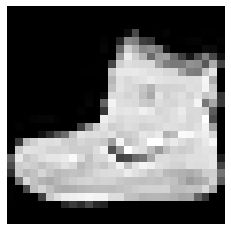

In [7]:
_ = plt.imshow(X_train[0],cmap='gray')
_ = plt.axis('off')

In [8]:
y_train[0]

9

In [9]:
# |   0   | T-shirt/top |
# |   1   | Trouser     |
# |   2   | Pullover    |
# |   3   | Dress       |
# |   4   | Coat        |
# |   5   | Sandal      |
# |   6   | Shirt       |
# |   7   | Sneaker     |
# |   8   | Bag         |
# |   9   | Ankle boot  |

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 数据处理

In [12]:
X_train = X_train.astype('f4')/255.0
X_test = X_test.astype('f4')/255.0
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [25]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [27]:
X_train.shape[1:]

(784,)

### model

In [13]:
from keras.layers import Dense

In [30]:
model = keras.models.Sequential()
model.add(Dense(256,activation='relu',input_shape=(X_train.shape[1:])))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='acc')

In [34]:
history = model.fit(X_train,y_train,batch_size=64,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
938/938 [==============================] - 6s 3ms/step - loss: 0.5298 - acc: 0.8113 - val_loss: 0.4312 - val_acc: 0.8460
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3739 - acc: 0.8632 - val_loss: 0.3662 - val_acc: 0.8652
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3358 - acc: 0.8762 - val_loss: 0.3822 - val_acc: 0.8621
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3109 - acc: 0.8850 - val_loss: 0.3684 - val_acc: 0.8740
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2896 - acc: 0.8924 - val_loss: 0.3486 - val_acc: 0.8706
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2777 - acc: 0.8964 - val_loss: 0.3543 - val_acc: 0.8751
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2634 - acc: 0.9011 - val_loss: 0.3390 - val_acc: 0.8739
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.

<AxesSubplot:>

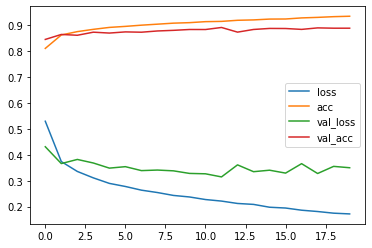

In [36]:
df = pd.DataFrame(history.history)
df.plot()

In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3501 - acc: 0.8894


[0.3501146137714386, 0.8894000053405762]

In [81]:
model.save('./fashion-mnist.h5')

In [40]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred[:32]

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 7,
       7, 5, 1, 4, 6, 0, 9, 3, 8, 8], dtype=int64)

### 数据分析

In [54]:
from sklearn.metrics import recall_score,confusion_matrix,plot_confusion_matrix
import seaborn as sns

In [47]:
y_test.argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
# |   0   | T-shirt/top |
# |   1   | Trouser     |
# |   2   | Pullover    |
# |   3   | Dress       |
# |   4   | Coat        |
# |   5   | Sandal      |
# |   6   | Shirt       |
# |   7   | Sneaker     |
# |   8   | Bag         |
# |   9   | Ankle boot  |

In [86]:
s = '''T-shirt/top
Trouser    
Pullover   
Dress      
Coat       
Sandal     
Shirt      
Sneaker    
Bag        
Ankle boot'''
s = s.split('\n')
s

['T-shirt/top',
 'Trouser    ',
 'Pullover   ',
 'Dress      ',
 'Coat       ',
 'Sandal     ',
 'Shirt      ',
 'Sneaker    ',
 'Bag        ',
 'Ankle boot']

<AxesSubplot:>

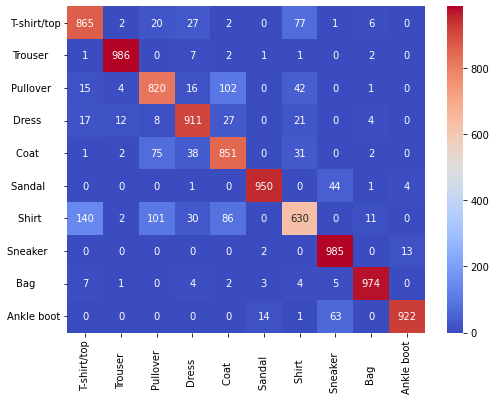

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred),xticklabels=s,yticklabels=s,cmap='coolwarm',annot=True,fmt='.0f')

可以发现网络对   
T-shirt与Shirt的分辨能力差  
Pullover与Shirt容易混淆

#### 每个类别的召回率

In [61]:
recall_score(y_test.argmax(axis=1),y_pred,average=None)

array([0.865, 0.986, 0.82 , 0.911, 0.851, 0.95 , 0.63 , 0.985, 0.974,
       0.922])

In [78]:
recall_score(y_test.argmax(axis=1),y_pred,average='micro')

0.8894